# Smart Mapping
Smart Mapping is a new capability built into ArcGIS Online and Portal for ArcGIS (10.3.1 and after) with which you can easily create beautiful and stunning maps. With smart mapping your GIS gets the ability to quickly analyze your data and set smart defaults allowing you to easily create an illustrative map.

To learn more about this exciting capability visit [the help page](http://www.esri.com/software/arcgis/smart-mapping) and [this blog article](https://blogs.esri.com/esri/arcgis/2015/03/02/introducing-smart-mapping/). Here is a [detailed help](http://doc.arcgis.com/en/arcgis-online/create-maps/change-style.htm) on the various ways you can symbolize your data.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Smart-Mapping" data-toc-modified-id="Smart-Mapping-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Smart Mapping</a></span><ul class="toc-item"><li><span><a href="#Visualizing-line-features" data-toc-modified-id="Visualizing-line-features-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Visualizing line features</a></span></li><li><span><a href="#Visualizing-area-features" data-toc-modified-id="Visualizing-area-features-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualizing area features</a></span></li><li><span><a href="#Visualizing-location-data" data-toc-modified-id="Visualizing-location-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualizing location data</a></span></li></ul></li></ul></div>

## Visualizing line features
The first example shows some ideas on visualizing linear features using a streets layer. When you add an `Item` object to your map, the map widget renders it using the default symbology of the item. With smart mapping, you can customize this. In this example we will use **ClassSizeRenderer** to emphasize differences in value by varying the thickness of line features.

In [ ]:
from arcgis.gis import *
gis = GIS()

In [ ]:
map1 = gis.map('USA',3)
map1

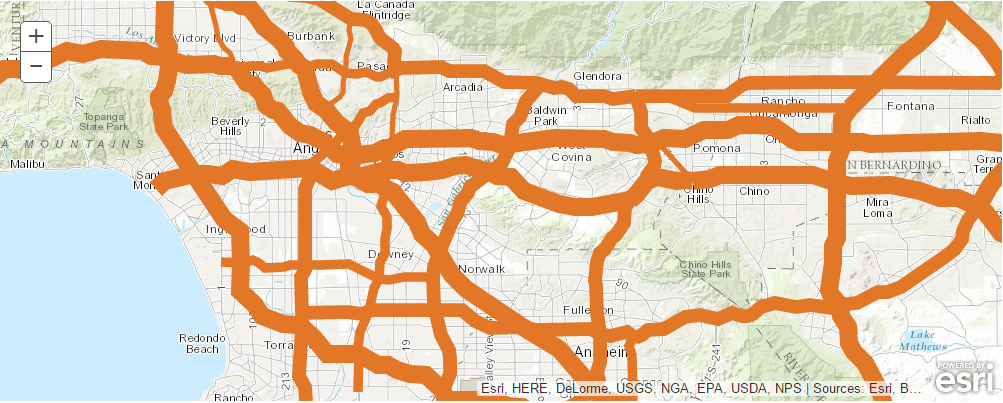</img>

Let us search for an item titled **USA Freeway System** by **Esri** and add that to the map

In [3]:
search_result = gis.content.search('title:USA freeway system AND owner:esri_dm', 
                                  item_type = 'Feature Layer')
search_result

[<Item title:"USA Freeway System" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"USA Freeway System" type:Feature Layer Collection owner:esri_dm>]

> **Note:** Either feature layer collection returned should work for this exercise. If the layer doesn't draw immediately, you may need to zoom in before features draw.

In [ ]:
freeway_item = search_result[0]
map1.add_layer(freeway_item)

The freeway layer uses a simple symbology. Let us visualize it by one of the fields available on the feature layer. To do that, we get the Item's layers as **FeatureLayer** objects. From the `FeatureLayer` object, we can find the url and available fields.

In [ ]:
# Use the first layer available on the service.
freeway_feature_layer = freeway_item.layers[0]

# Print the layer's url and field names.
print(freeway_feature_layer.url)
for field in freeway_feature_layer.properties['fields']:
    print(field['name'])

http://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Freeway_System/FeatureServer/1
OBJECTID
ROUTE_NUM
CLASS
NUMBER
SUFFIX
DIST_MILES
DIST_KM


Let us use `DIST_MILES` field and symbolize it with varying colors. Let us also change the extent of the map to illustrate the differences better.

In [ ]:
map1.add_layer(freeway_feature_layer, {"renderer":"ClassedSizeRenderer", "field_name": "DIST_MILES"})

In [ ]:
# Change map's extent to Los Angeles city
map1.center = [34, -118]

In [ ]:
map1.zoom = 10

Thus, we represented longer freeways as thicker lines and shorter ones with thinner lines.

## Visualizing area features
Area or polygon features are typically symbolized in varying colors to represent the differences in values. The example below shows how a **Classed Color Renderer** can be used to visualize the population differences between the counties of the state of Washington.

As you have seen in the previous sample, by using the **smart mapping** capability, you can author the map just by specifying the renderer type and the field to use and your GIS does the rest such identifying a suitable color scheme based on your basemap and the min and max values for the color ramp.

The sample also shows how a definition expression can be used to limit the features displayed from the layer, and how the layer can be represented with transparency allowing the basemap to be seen.

In [ ]:
map2 = gis.map('Seattle, WA', 6)

In [ ]:
map2

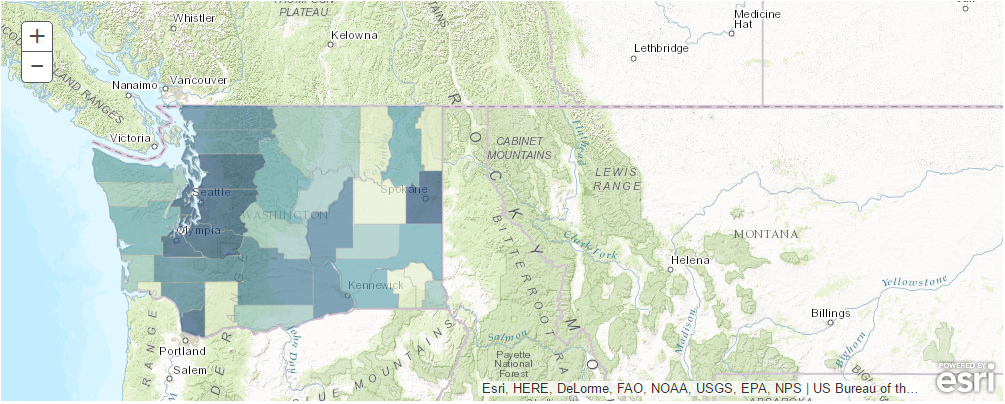</img>

The steps to search for a Feature Layer item and obtaining its url is demonstrated in the previous sample. For brevity, this sample skips that part.

In [ ]:
map2.add_layer({"type":"FeatureLayer", 
               "url":"//sampleserver6.arcgisonline.com/arcgis/rest/services/Census/MapServer/2",
               "definition_expression" : "STATE_NAME='Washington'",
               "renderer":"ClassedColorRenderer",
               "field_name":"POP2007",
               "opacity":0.7
              })

## Visualizing location data
Point features are the most common type of location data. Smart mapping provides a special visualization technique called **heatmap**. The heatmap renderer is useful when representing the spatial distribution or clustering of points as it represents the relative density of points on a map as smoothly varying sets of colors ranging from cool (low density) to hot (many points).

Thus, the sample below visualizes earthquake occurrences in Southern California, using the heatmap renderer

In [ ]:
map3 = gis.map('Los Angeles', 8)

In [ ]:
map3

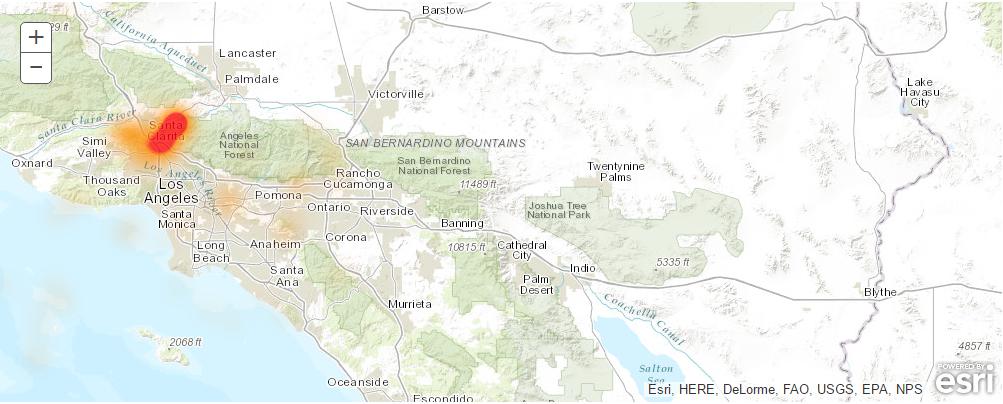</img>

In [ ]:
map3.add_layer({"type":"FeatureLayer",
                "url":"http://services1.arcgis.com/hLJbHVT9ZrDIzK0I/arcgis/rest/services/EQMagGt4/FeatureServer/0",
                "renderer":"HeatmapRenderer",
                "opacity":0.75})